In [1]:
import pandas as pd
import numpy as np

from datetime import datetime


import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.dates import date2num

import corona_variants_bw_helper as cvh
#import camelot

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

import pathlib
cwd = pathlib.Path.cwd()

# Read and Prepare Data

In [2]:
data = pd.read_csv("./data/data_corona_varianten.tsv",
            infer_datetime_format=True,
            delimiter="\t")

In [3]:
data.keys()

Index(['Timestamp', 'Dayname', '0-9', '10-19', '20-29', '30-39', '40-49',
       '50-59', '60-69', '70-79', '80-89', '90', 'Faelle', 'nLKs',
       'Faelle_Varianten_Typ', 'B117', 'B1351', 'B11281',
       'nAusbrueche_KW53_2020', 'nAusbrueche_KW53_2020_Varinten',
       'n_Ausbrueche_Pflegeheimen', 'nAusbrueche_Pflefeheimen_Varianten',
       'n_Ausbrueche_Schulen', 'n_Ausbrueche_Schulen_Varianten',
       'n_Ausbrueche_Kitas', 'n_Ausbrueche_Kitas_Varianten',
       'n_neue_Fälle_ges', 'n_ges'],
      dtype='object')

In [4]:
age_groups = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90"]

In [5]:
# add a column containing the sum on that day
data['sum_agegroups']=data[age_groups].sum(axis=1)

In [6]:
data["Timestamp"] = pd.to_datetime(data.Timestamp, format="%d.%m.%y %H:%M")

In [7]:
#data

In [8]:
data[["Timestamp", "Faelle", "sum_agegroups"]]

,Timestamp,Faelle,sum_agegroups
0,2021-02-08 16:00:00,1081,1081
1,2021-02-09 16:00:00,1246,1246
2,2021-02-10 16:00:00,1232,1232
3,2021-02-11 16:00:00,1371,1370
4,2021-02-12 16:00:00,1576,1575
...,...,...,...
57,2021-04-06 16:00:00,38718,38707
58,2021-04-07 16:00:00,40505,40494
59,2021-04-08 16:00:00,42728,42715
60,2021-04-09 16:00:00,45279,45291


In [9]:
Y_MAX = data[age_groups].max().max()
print(Y_MAX)

8057


increment of data

In [10]:
data = data.drop('Dayname', 1)

In [11]:
Δdata = data.diff()
# if all increments of time are one day then replace with original dates (not increments)
Δdata["Timestamp"] = data["Timestamp"]

In [12]:
#Δdata

# Plotting

animate the daily incidences per age group

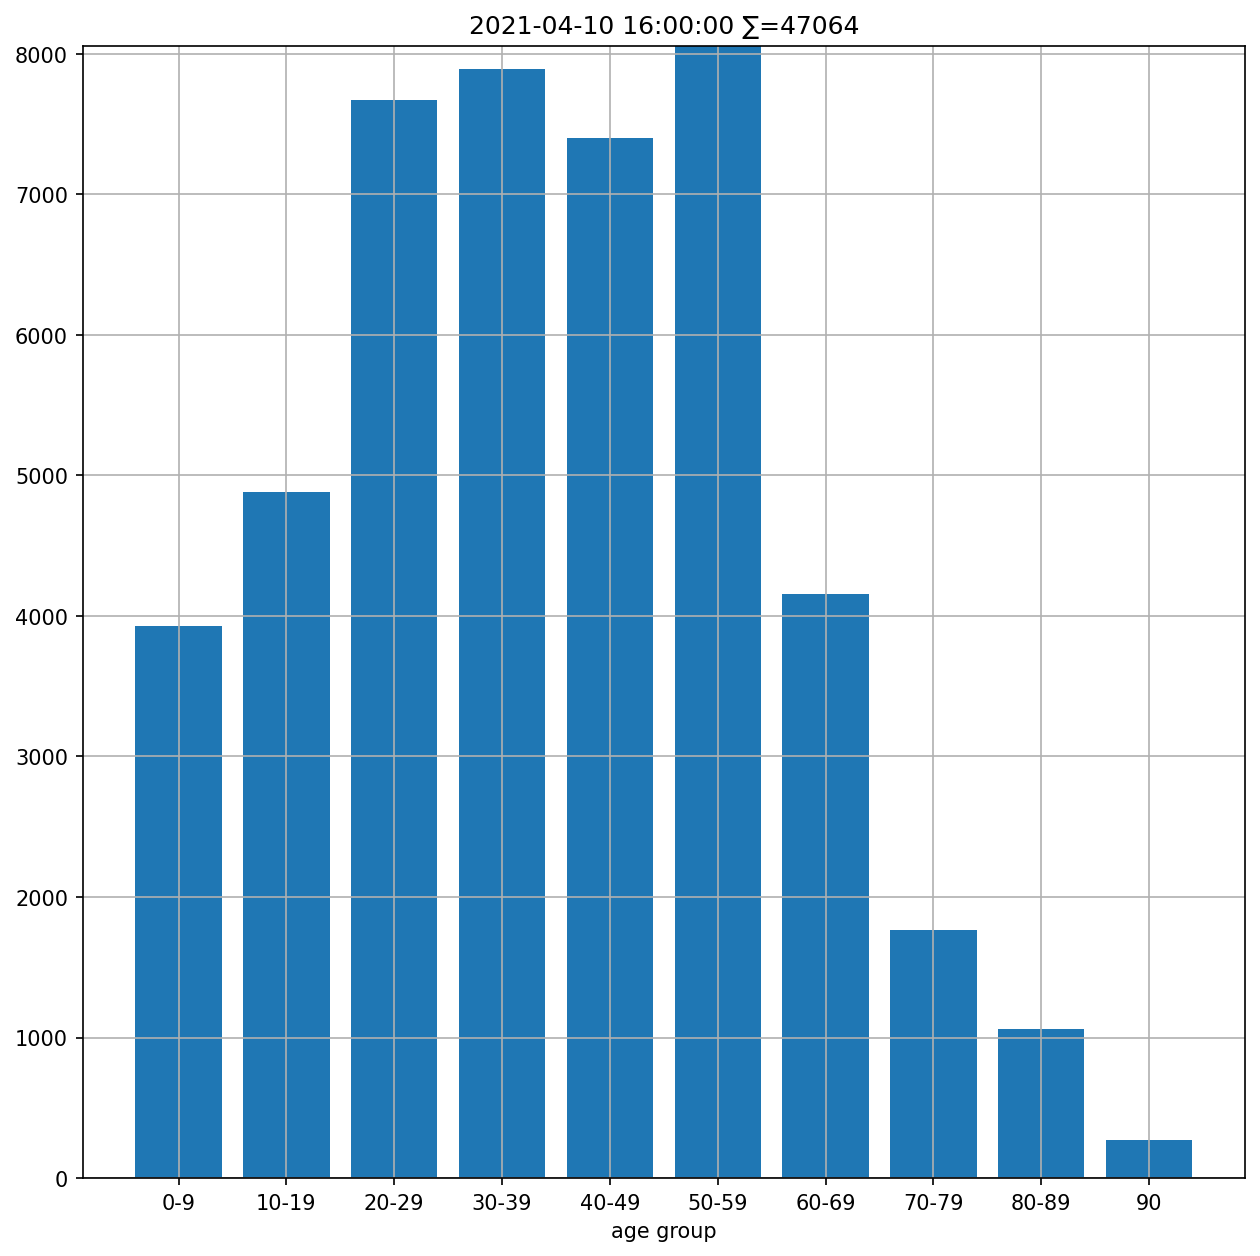

In [13]:
# following this stackoverflow post for animation
#    https://stackoverflow.com/a/42143866
mydpi=150
n_samples = data.shape[0]

fig, ax = plt.subplots(figsize=(10,10), 
                       dpi=mydpi)
ax.grid(True)
ax.set_xlabel('age group')
ax.set_ylim(0.,Y_MAX)

cur_height = np.zeros_like(np.array(data.loc[0][age_groups]))
barcollection = ax.bar(age_groups, cur_height)


def animate(i):
    cur_height = np.array(data.loc[i][age_groups])
    ax.set_title(str(data.loc[i][0]) + f" ∑={data['sum_agegroups'][i]}")
    for i, b in enumerate(barcollection):
        b.set_height(cur_height[i])
        
        


ani = animation.FuncAnimation(fig, 
                              animate, 
                              frames=n_samples, 
                              interval=100, 
                              blit=False,
                              repeat=False)
ani.save(cwd / 'out' / 'daily_cases_bw.mp4',
        writer=animation.FFMpegWriter(fps=10, bitrate=900),
        dpi=mydpi)
#plt.close()
#ani



this shows each plot individually

In [14]:
# for i in range(data.index[-1]+1):
#     print(i)
#     cur_height = np.array(data.loc[i][age_groups])
#     plt.bar(age_groups, 
#             height=cur_height,
#            zorder=999)
#     plt.grid(True)
#     plt.xlabel('age group')
#     plt.ylim(0.,Y_MAX)
#     plt.title(str(data.loc[i][0]) + f" ∑={data['sum_agegroups'][i]}")
#     plt.show()
#     plt.close()

## Plot des Zuwachses

In [15]:
max_increment = data[age_groups].diff().max(axis=0).max()

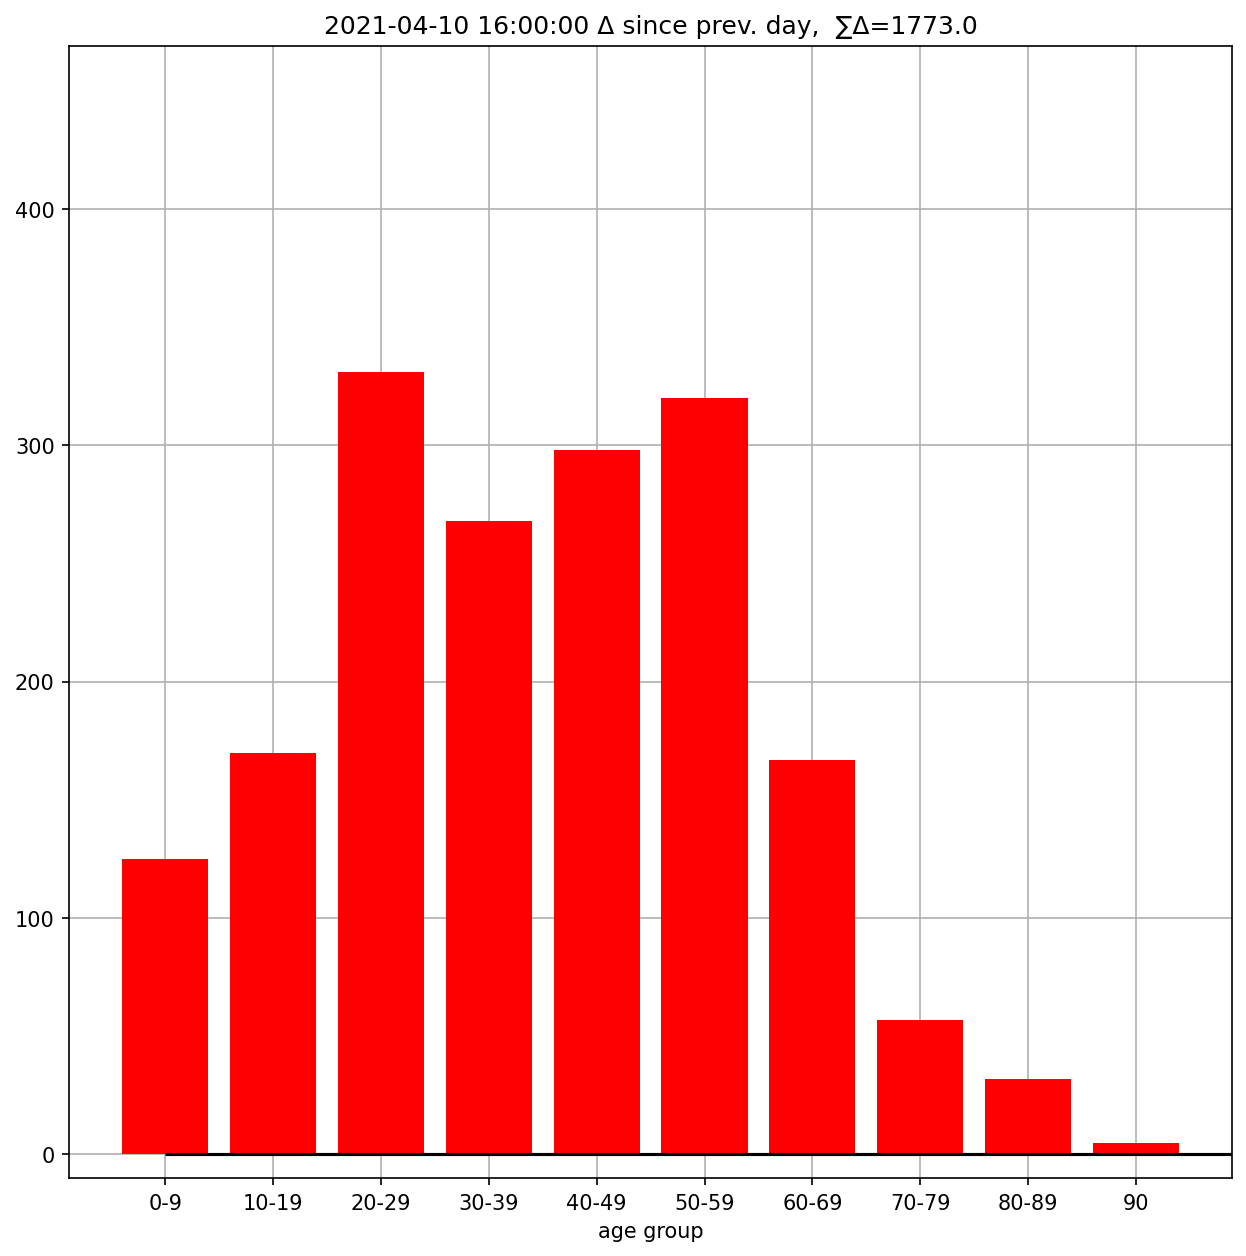

In [16]:
# following this stackoverflow post for animation
#    https://stackoverflow.com/a/42143866
mydpi=150
n_samples = data.shape[0]

fig, ax = plt.subplots(figsize=(10,10), 
                       dpi=mydpi)
ax.grid(True)
ax.set_xlabel('age group')
ax.set_ylim(-10.,max_increment)
ax.hlines(0,0,10,  colors='k', zorder=999)
    

Δ = data[age_groups].diff()
sum_delta = Δ.sum(axis=1)

cur_height = np.zeros_like(np.array(Δ.loc[0]))
barcollection = ax.bar(age_groups, 
                       height=cur_height,
                       bottom=0,
                       color='red',
                       zorder=998)


def animate(i):
    cur_height = Δ.loc[i]
    ax.set_title(str(data.loc[i][0]) + f" Δ since prev. day,  ∑Δ={sum_delta[i]}")
    for i, b in enumerate(barcollection):
        b.set_height(cur_height[i])
        
        


ani = animation.FuncAnimation(fig, 
                              animate, 
                              frames=n_samples, 
                              interval=100, 
                              blit=False,
                              repeat=False)
ani.save(cwd / 'out' /'daily_cases_bw_Δ.mp4', 
         dpi=mydpi,
         writer=animation.FFMpegWriter(fps=10, bitrate=900))
#plt.close()
#ani

for each day individually

In [17]:
# for i in np.arange(start=1, stop=data.index[-1]+1):
#     # print(i)
#     cur_height = np.array(data.loc[i][age_groups])
#     # print(cur_height)
#     prev_height = np.array(data.loc[i-1][age_groups])
#     # print(prev_height)
#     Δ = cur_height - prev_height
#     # print(bottom)
#     sum_delta = Δ.sum()

    
#     # plot current height
# #     plt.bar(age_groups, 
# #             height=cur_height,
# #            zorder=995)
#     # plot change since last time
#     plt.bar(age_groups, 
#             height=Δ,
#             bottom=0,
#             color='red',
#             zorder=998,
#             label=f"Δ since yesterday,  ∑Δ={Δ.sum()}")
#     plt.hlines(0,0,10,  colors='k', zorder=999)
#     plt.grid(True)
#     plt.xlabel('age group')
#     plt.ylim(-10.,max_increment) # Y_MAX
#     plt.title(data.loc[i][0])
#     plt.legend(loc='best')
#     plt.show()
#     plt.close()

## Evolution over Time

In [18]:
#data

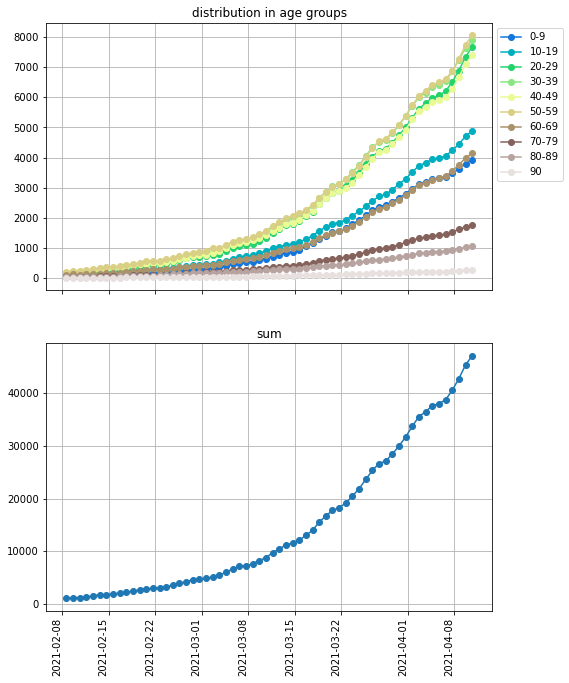

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,12))

cur_cm = cm.terrain
d = np.linspace(0.1, 0.95, len(age_groups))


for cur_ix, cur_age in enumerate(age_groups):
    age_plot = ax[0].plot(data["Timestamp"],
                          data[cur_age],
                          "o-",
                          label=cur_age,
                          color=cur_cm(d[cur_ix])
                          )

ax[0].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[0].grid(True)
ax[0].title.set_text("distribution in age groups")

# plot the sum
ax[1].plot(data["Timestamp"],
          data["sum_agegroups"],
          "o-",)
ax[1].grid(True)
ax[1].title.set_text("sum")
fig.autofmt_xdate(rotation=90)

plt.savefig(cwd / 'out' /'age_groups_over_time.png', dpi=150)

### Inzidenz Relative to Age Distribution

a value of unity indicates that the percentage of people infected in that age group is equal to the percentage of living people in that age group

In [20]:
# load population data
grouped_age_distributions= pd.read_csv('./data/grouped_age_distributions_bw.csv')
grouped_age_distributions_std = grouped_age_distributions["2019_n"] /   grouped_age_distributions["2019_n"].sum()

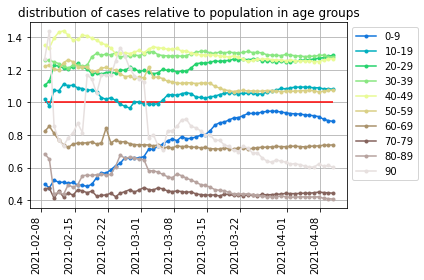

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1)

cur_cm = cm.terrain
d = np.linspace(0.1, 0.95, len(age_groups))


for cur_ix, cur_age in enumerate(age_groups):
    
    cur_faelle_std = data[cur_age] / data["Faelle"]
    cur_rel_age_dist = cur_faelle_std / grouped_age_distributions_std[cur_ix]
    
    age_plot = ax.plot(data["Timestamp"],
                          cur_rel_age_dist,
                          ".-",
                          label=cur_age,
                          color=cur_cm(d[cur_ix])
                          )
ax.hlines(1.0,
          data["Timestamp"][:1], 
          data["Timestamp"][-1:],
         color='red')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.grid(True)
ax.title.set_text("distribution of cases relative to population in age groups")
fig.autofmt_xdate(rotation=90)
plt.tight_layout()
plt.savefig(cwd / 'out' /'inzidenz_rel_age_dist.png', dpi=200)


### Anstieg der Fälle pro Tag

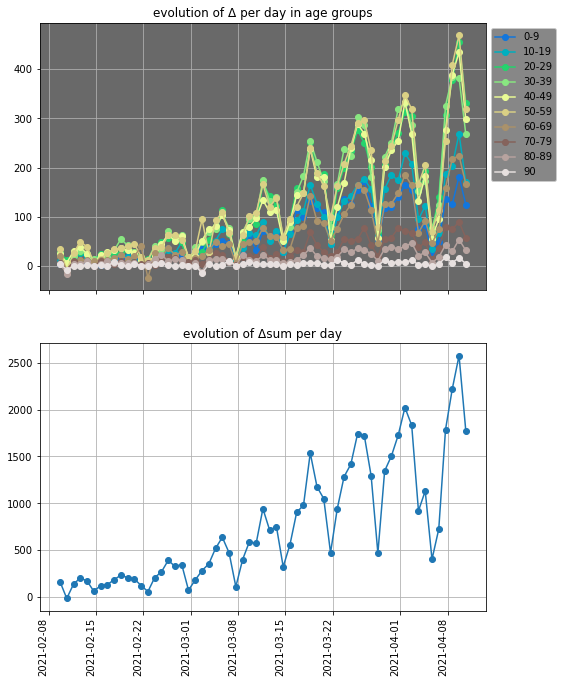

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,12))

cur_cm = cm.terrain
d = np.linspace(0.1, 0.95, len(age_groups))

for cur_ix, cur_age in enumerate(age_groups):
    age_plot = ax[0].plot(Δdata["Timestamp"],
                          Δdata[cur_age],
                          "o-",
                          label=cur_age,
                          color=cur_cm(d[cur_ix])
                          )
ax[0].set_facecolor("dimgrey") 
ax[0].legend(bbox_to_anchor=(1,1), loc="upper left", facecolor="dimgrey")
ax[0].grid(True)
ax[0].title.set_text("evolution of Δ per day in age groups")

# plot the sum
ax[1].plot(Δdata["Timestamp"],
          Δdata["sum_agegroups"],
          "o-",)
ax[1].grid(True)
ax[1].title.set_text("evolution of Δsum per day")
fig.autofmt_xdate(rotation=90)
plt.savefig(cwd / 'out' /'inzidenz_rel_age_dist_Δ.png', dpi=200)

## Pflegeheime, Schulen, Kitas

'Timestamp', 
'0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90', 
'Faelle', 'nLKs',
'Faelle_Varianten_Typ', 'B117', 'B1351', 
'nAusbrueche_KW53_2020', 'nAusbrueche_KW53_2020_Varinten', 
'n_Ausbrueche_Pflegeheimen', 'nAusbrueche_Pflefeheimen_Varianten', 
'n_Ausbrueche_Schulen', 'n_Ausbrueche_Schulen_Varianten', 
'n_Ausbrueche_Kitas', 'n_Ausbrueche_Kitas_Varianten'],

In [28]:
import importlib
importlib.reload(cvh)

<module 'corona_variants_bw_helper' from '/Users/claushaslauer/Documents/_CodeDev/corona_varianten_bw/corona_variants_bw_helper.py'>

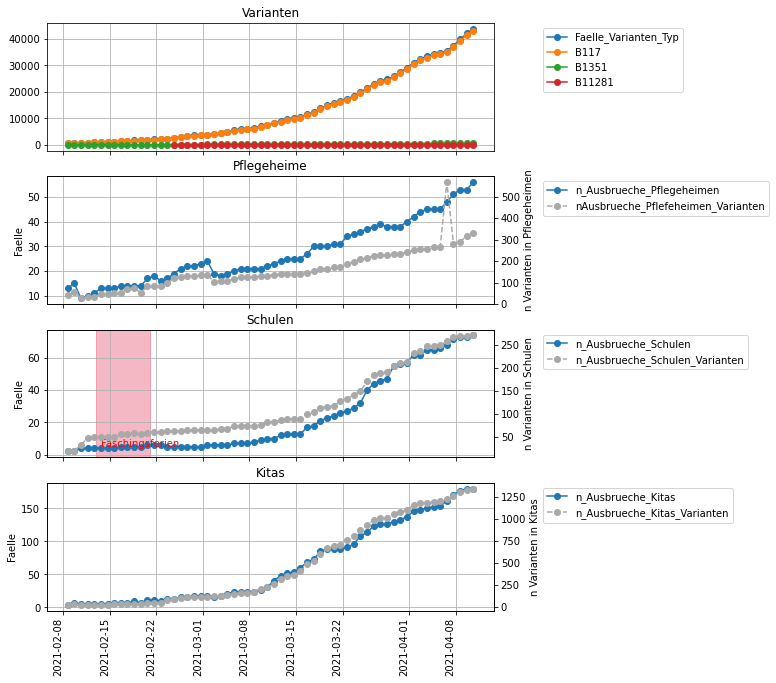

In [29]:
cvh.plot_pflege_schule_kitas(data)

/Users/claushaslauer/Documents/_CodeDev/corona_varianten_bw/corona_variants_bw_helper.py:70: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fe2792b9670> has a label of '_line0' which cannot be automatically added to the legend.
  ax[0].legend(lns, labs, bbox_to_anchor=(1.1,1), loc="upper left")


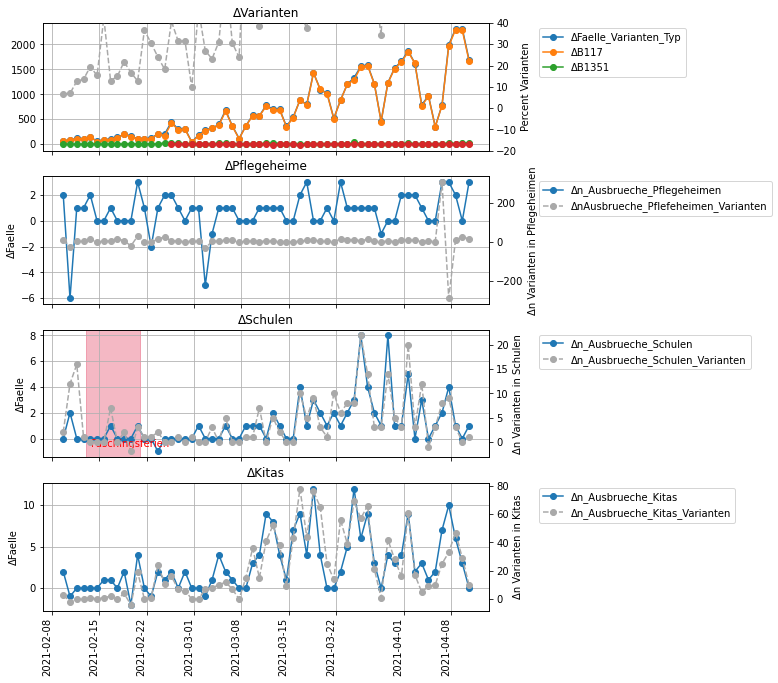

In [30]:
cvh.plot_pflege_schule_kitas(Δdata, flag="Δ")

read from PDF

In [ ]:
pdfobject=open('210208_COVID_Tagesbericht_LGA.pdf','rb')

In [ ]:
pdf=pypdf.PdfFileReader(pdfobject)

In [ ]:
pdf.pages

In [ ]:
tables = camelot.read_pdf('210208_COVID_Tagesbericht_LGA.pdf')

In [ ]:
!gs

In [ ]:
import datetime

In [ ]:
FERIEN = {{"name": "Herbstferien 2021",
            "start": datetime.datetime(2021,2,13),
            "stop": datetime.datetime(2021,2,21)},
          {"name": "Osterferien 2021"  
            "start": datetime.datetime(2021,3,31),
            "stop": datetime.datetime(2021,4,11)
          }

In [ ]:
FERIEN["name"]